In [1]:
# Fill in the UNI of your team members:
# UNI1 = emy2114
# UNI2 =

# late_days_used = 1

# Phylogenetic Analysis

In this project, you will delve into the field of phylogenomics, using your Python programming skills to analyze genomic sequences from various animal species. You will be using sequencing data to measure the distances between species, implement a clustering algorithm to reconstruct the evolutionary relationships and implementing a TreeNode class to represent the nodes of a phylogenetic tree, and then using this class to analyse the phylogenetic tree.

Phylogenetic analysis is a method used in biology to study the evolutionary relationships between different species or organisms. The primary goal of this analysis is to construct a "phylogenetic tree," a diagram that represents these evolutionary relationships in a tree-like form. Each branch of the tree denotes a species or a group of species, and the structure of the tree reflects how these species have diverged from common ancestral lines over time.

Your job will be to fill in all the spots denoted with 'YOUR RESPONSE HERE' etc. The code responses are marked with a # YOUR CODE HERE comment. Please make sure to remove the raise NotImplementedError line when you write your code.

Before we begin, modify the code block before to check you have the necessary imports and modify the path to data to the correct location.



In [2]:
import pandas as pd
import numpy as np
import ete3

path_to_data = r"/Users/ethanyoder/Desktop/species/"


# Part 1: Loading the Data (4pts)

The data for this project consists of a set of genomic sequences from 15 different species. The sequences are stored in text files in the data directory specified by the path_to_data variable. Each file contains the genomic sequence for a single species, and the name of the file is the name of the species. For example, the file data/ape.txt contains the genomic sequence for the ape species.  

In this part of the project, you will

Question 1a [2pt].
 Iterate over all the files in the directory and read the genomic sequences into a dictionary. The keys of the dictionary will be the species names (extracted from the file name), and the values will be the genomic sequences **as a list**. Be careful to remove any newline characters or spaces from the genomic sequences.

Question 1b [1pt]
 Convert the dictionary into a pandas DataFrame. The rows of the DataFrame should be the species names, and the columns should be the positions in the genomic sequences. The values in the DataFrame should be the nucleotides at each position for each species. For example, the DataFrame entry at row 'ape' and column 1000 should be the nucleotide at position 1000 in the ape genomic sequence. Save this dataframe as a variable named `full_species_data`. The dimension of your dataframe should be 232 columns × 14 rows

Question 1c[1pt]
 Print the first 5 rows of the DataFrame.


*Potential Hints:*
1. You may find the string function `.replace()` useful in parsing your sequence.
2. Remember that strings can be converted into lists using `list('ABCD') -> ['A','B','C','D']`
3. You may find it helpful to make use of the transpose function. To transpose a dataframe `df`, you can call `df.T`



In [3]:
import os

species_sequences = {}

for filename in os.listdir(path_to_data):
    
    # YOUR CODE HERE
    
    if filename.endswith(".txt"):
        species_name = filename.replace(".txt", "")
        
        with open(os.path.join(path_to_data, filename), 'r') as file:
            sequence = file.read().replace('\n', '').replace(' ', '')
            species_sequences[species_name] = list(sequence)
    
# Check to make sure the sequence is in the expected format
assert species_sequences['Bovine'][:10] == ['A', 'C', 'C', 'A', 'A', 'A', 'C', 'C', 'T', 'G']


In [4]:
# Convert dictionary to DataFrame; save this DataFrame as full_species_data

full_species_data = pd.DataFrame.from_dict(species_sequences, orient='index')


In [5]:
# Display the first 5 rows of the dataframe

full_species_data.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
Tarsier,A,T,C,T,A,C,C,T,T,A,...,G,T,T,T,G,A,A,C,A,C
Gorilla,A,C,C,C,C,A,T,T,T,A,...,A,C,A,A,T,A,C,C,A,C
Jpn Macaq,A,C,T,C,C,A,C,C,T,G,...,G,C,A,A,A,C,A,G,A,C
Orang,A,C,C,C,C,A,C,C,C,G,...,C,C,G,A,A,A,C,A,A,C
Rhesus Mac,A,C,T,T,C,A,C,C,C,G,...,A,C,A,A,A,C,A,A,A,C


In [6]:
full_species_data.shape

(14, 232)

In [7]:
assert full_species_data.shape == (14, 232)

# Part 2: Exploratory Data Visualization (6pts)

We can perform some exploratory analysis of this data by visualizing how the species differ on a heatmap. The package seaborn provides convenient functionality for doing this. However, in order to plot data using a heatmap, we need to convert our string data into numeric data.

In the cell below, we convert our dataframe into a numerical format, where 'A' corresponds to 0,'T' corresponds to 1,'C' corresponds to 2 and 'G' corresponds to 3.

In [8]:
encode = {'A':0,'T':1,'C':2,'G':3}
encoded_data = full_species_data.copy()
for col in full_species_data.columns:
    encoded_data[col] = full_species_data[col].map(lambda x: encode[x])
encoded_data.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
Tarsier,0,1,2,1,0,2,2,1,1,0,...,3,1,1,1,3,0,0,2,0,2
Gorilla,0,2,2,2,2,0,1,1,1,0,...,0,2,0,0,1,0,2,2,0,2
Jpn Macaq,0,2,1,2,2,0,2,2,1,3,...,3,2,0,0,0,2,0,3,0,2
Orang,0,2,2,2,2,0,2,2,2,3,...,2,2,3,0,0,0,2,0,0,2
Rhesus Mac,0,2,1,1,2,0,2,2,2,3,...,0,2,0,0,0,2,0,0,0,2


Question 2a [1pt].

Use `seaborn` to **display a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)** of the encoded data, where each row corresponds to a species. Play around with a colour map you like that allows you to visualise the different bases. Seaborn [documentation](https://seaborn.pydata.org/tutorial/color_palettes.html) describes some common color palettes.




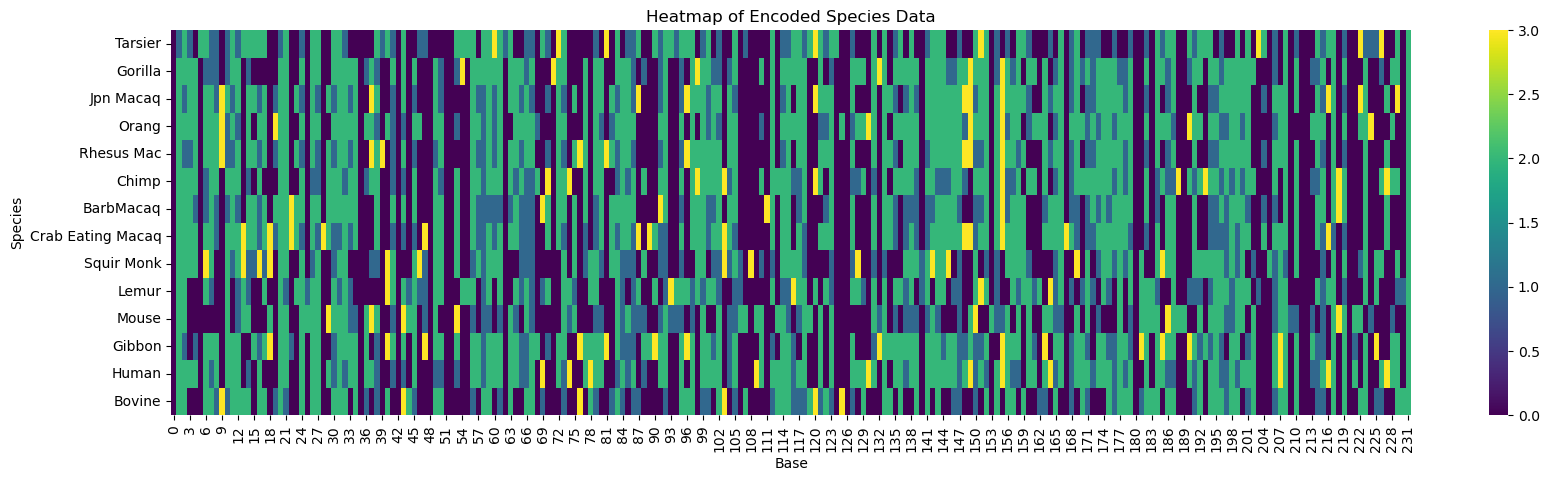

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

sns.heatmap(encoded_data, annot=False, cmap='viridis')
plt.title('Heatmap of Encoded Species Data')
plt.xlabel('Base')
plt.ylabel('Species')

plt.show()


Question 2b [2pt].

From our heatmap, we observe that there are some genomic positions that are conserved across all species - they have the same nucleotide across all species. Since these positions are not informative, we can remove them from our dataset. In this problem, find all the positions that are conserved across all species, and remove them from the dataset. Print the number of positions that were removed from the dataset. There should be 12 conserved positions that we remove - the shape of your dataframe should be (14, 220) after removing these positions.

*Hint: You might find the function var() useful to choose which columns to select as conserved. You can also use the function drop() to remove columns from a dataframe.*



In [10]:
# Identify conserved positions (all values in a column are the same)
conserved_positions = full_species_data.apply(lambda x: x.nunique() == 1)

# Remove the conserved positions from the DataFrame
species_data = full_species_data.loc[:, ~conserved_positions]

# Print the number of conserved positions removed
num_conserved_positions = conserved_positions.sum()
print('Number of conserved positions removed:', num_conserved_positions)


Number of conserved positions removed: 12


In [11]:
assert species_data.shape == (14, 220)

# Part 3: Hierarchical Clustering (3pts)

In this section of the project, we will implement a hierarchical clustering algorithm to cluster the species based on their genomic sequences. We will use the Hamming distance to measure the distance between two sequences. The Hamming distance between two sequences is the number of positions at which the sequences differ. For example, the Hamming distance between the sequences 'ATCG' and 'ATGG' is 1, since the sequences differ at the third position.

Question 3a [2pt].

Implement a `compute_hamming_distance()` function that takes in two sequences as arguments and returns the Hamming distance between them. The sequences will be represented as np.arrays of nucleotides, as in the previous parts of the project. The function should return a value of type int.




In [12]:
def compute_hamming_distance(seq1, seq2):
    """
    Computes the Hamming distance between two sequences.
    :param seq1: (np.array) sequence of nucleotides
    :param seq2: (np.array) sequence of nucleotides
    :return: (int) Hamming distance between the sequences
    """
    assert len(seq1) == len(seq2), 'The sequences must have the same length.'
    assert isinstance(seq1, np.ndarray), 'The sequences must be represented as numpy arrays.'
    assert isinstance(seq2, np.ndarray), 'The sequences must be represented as numpy arrays.'
    # YOUR CODE HERE
    hamming_distance = np.sum(seq1 != seq2)
    return hamming_distance
    
    #raise NotImplementedError

In [13]:
# Check that the function returns the correct output for some example inputs
assert compute_hamming_distance(np.array(['A','T','C','G']), np.array(['A','T','C','G'])) == 0
assert compute_hamming_distance(np.array(['A','T','C','G']), np.array(['A','T','C','T'])) == 1
assert compute_hamming_distance(np.array(['A','T','C','G']), np.array(['A','T','C','A'])) == 1

Question 3b [3pt].

Construct a distance matrix for the species data. The distance matrix should be a pandas DataFrame, where the rows and columns are the species names, and the values are the Hamming distances between the species. Save this DataFrame as a variable named `distance_matrix`. The dimension of your dataframe should be 14 rows × 14 columns. Use the `compute_hamming_distance()` function you implemented in the previous part of the project to compute the Hamming distances between the species. You may find the functions `pdist()` and `squareform()` from the `scipy.spatial.distance` package useful.

In [14]:
from scipy.spatial.distance import pdist, squareform

def compute_pairwise_distances(data):
    
    """
    Computes the pairwise Hamming distances between the species.
    :param data: (pd.DataFrame) dataframe containing the genomic data for each species. 
    The rows of the dataframe should be the species names, 
    and the columns should be the positions in the genomic sequences.
    
    :return: (pd.DataFrame) dataframe containing the pairwise Hamming distances between the species. 
    The rows and columns of the dataframe should be the species names.
    """

    # YOUR CODE HERE
    
    # Function to be used with pdist
    def hamming_wrapper(u, v):
        return compute_hamming_distance(u, v)

    # Convert the DataFrame to a NumPy array for distance calculation
    data_array = data.to_numpy()

    # Compute pairwise Hamming distances
    pairwise_dist = pdist(data_array, metric=hamming_wrapper)

    # Convert the pairwise distances to a square form DataFrame
    distance_matrix = pd.DataFrame(squareform(pairwise_dist), index=data.index, columns=data.index)

    assert isinstance(distance_matrix, pd.DataFrame), f"""
    Distance matrix should be a DataFrame, not a {type(distance_matrix)}."""
    return distance_matrix

In [15]:
distance_matrix = compute_pairwise_distances(species_data)

In [16]:
assert distance_matrix.shape == (14,14), 'Distance matrix is the incorrect shape'
# Check to make sure that the index and columns of the distance matrix are the species names
assert all(distance_matrix.index == species_data.index), 'The index of the distance matrix should be the species names.'

We can visualize the results of our distance matrix by plotting a clustermap of the data. The clustermap will group the species based on their distances. The clustermap will also show the dendrogram of the hierarchical clustering algorithm. The dendrogram shows the order in which the species were clustered together. The dendrogram is useful for visualizing the hierarchical clustering algorithm, but we will implement our own version of the algorithm in the next part of the project.



<Figure size 1000x1000 with 0 Axes>

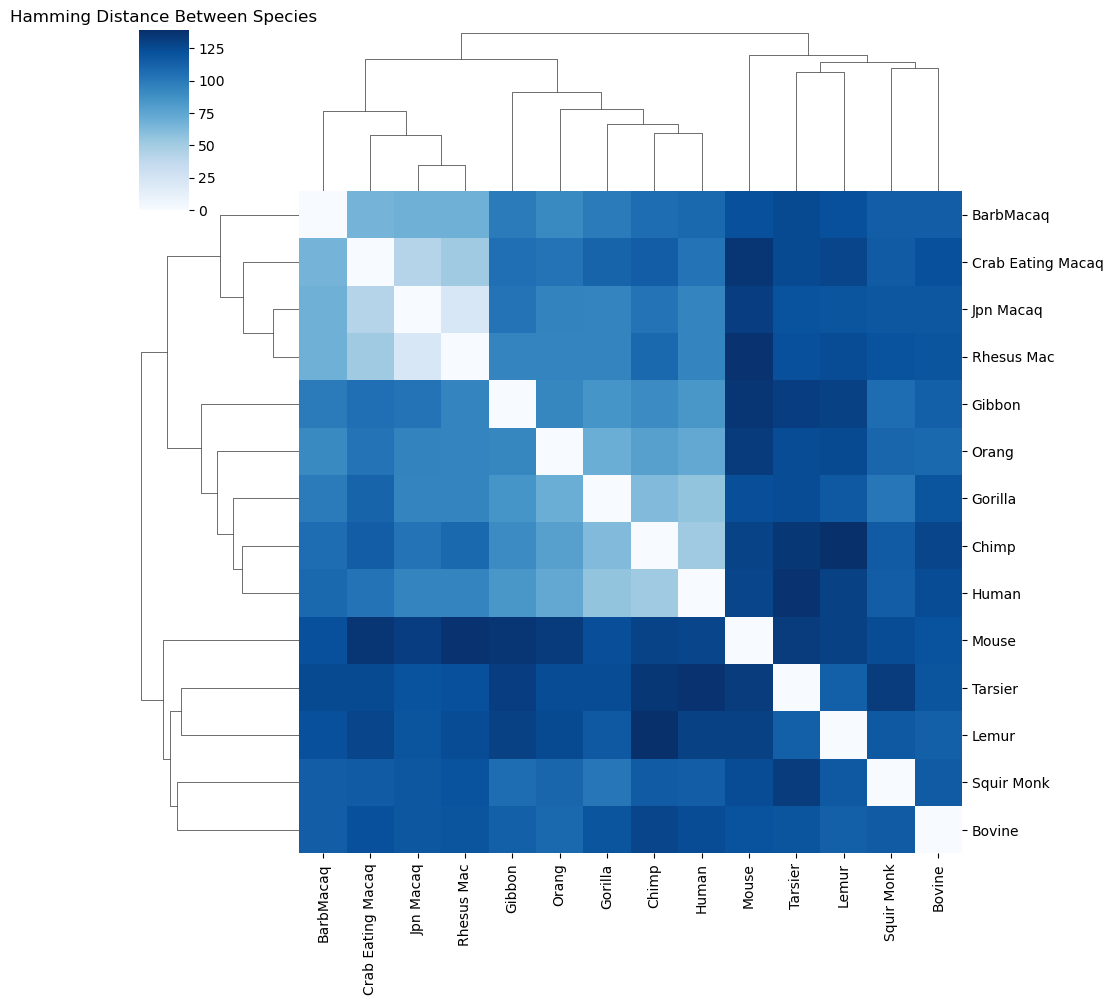

In [17]:
# Suppress ClusterWarning from scipy
import warnings
from scipy.cluster.hierarchy import ClusterWarning
warnings.simplefilter(action='ignore', category=ClusterWarning)

plt.figure(figsize=(10,10))
sns.clustermap(distance_matrix, cmap='Blues')
plt.title('Hamming Distance Between Species')
plt.show()
plt.close()


Question 3c [1pt].

We will now implement the hierarchical clustering algorithm. We will cluster species as follows: Given a distance matrix, we will find the pair of species that are closest together, and merge them into a single cluster. Suppose the closest pair of species are species A and species B. The merged cluster is represented as (A,B) and the distance from the merged cluster (A,B) to another species C is the average of the distances from A to C and B to C. We will repeat this process until all the species are clustered together.

The result from this clustering will be a Newick string representing the phylogenetic relation between species. For example the Newick string ((A,B),(C,D)) represents the following phylogenetic tree (where A, B, C, and D are species):

In [18]:
visualize_newick = """            ________|________
            |                |
            |                |
        _________       _________
        |       |       |       |
        |       |       |       |
        A       B      C        D
"""
print(visualize_newick)
print('Newick string: ((A,B),(C,D))')

            ________|________
            |                |
            |                |
        _________       _________
        |       |       |       |
        |       |       |       |
        A       B      C        D

Newick string: ((A,B),(C,D))


In [19]:
# First, here are some helper functions to help us with the clustering algorithm

def get_most_similar_species(distances):
    """ Return the column names of the two most similar species in the distance
        matrix.

        For example if we have a DataFrame:
        	    A	B	C
        index
            A	nan	5	2
            B	5	nan	1
            C   2   1   nan

        We would return (B,C) or (C,B) - doesn't matter which one.

        @param: distances (pd.DataFrame of dimension n_species x n_species)
        @return tuple containing the names of (species1, species2)
    """

    ix1, ix2 =  np.unravel_index(np.nanargmin(distances), distances.shape)
    return distances.columns[ix1], distances.columns[ix2]

def merge_distances(distances, species1, species2):
    """
    Replace the distance of each species to species1 and to species2 with its
    distance to the merged node (species1, species2).
    Removes species1 and species2 from the distance matrix.
    @param: distances - (pd.DataFrame) with shape n_species x n_species
    @param: species1 - (str) name of species1
    @param: species2 - (str) name of species2

    @return: distances - (pd.DataFrame) with shape n_species-1 x n_species-1

    """
    merged = f'({species1},{species2})'
    distances[merged] = (distances[species1]+distances[species2])/2
    distances = pd.concat([distances, distances[[merged]].T])
    for axis in [0,1]:
        for species in [species1, species2]:
            distances.drop(species, axis=axis, inplace=True)
    return distances

# Now we will implement the hierarchical clustering algorithm
def hierarchical_clustering(distances):
    """
    Perform hierarchical clustering on the species using the distances between
    them.
    @param: distances - (pd.DataFrame) with shape n_species x n_species
    @return: newick_string - (str) newick string representing the phylogenetic
                             tree
    """
    
    # Make a copy of the distance matrix so that we don't modify the original
    distances = distances.copy()
    # Fill the diagonal of the distance matrix with np.nan; otherwise, the diagonal will be the minimum distance (and there is no
    # point in comparing a species to itself)
    np.fill_diagonal(distances.values, np.nan)
    # Hierarchical Clustering
    while len(distances) > 1:
        # Find the most similar pair of species
        species1, species2 = get_most_similar_species(distances)
        #raise NotImplementedError

        # We now replace the distance from every species to species 1 and to
        # species 2 with the average distance to both species
        distances = merge_distances(distances, species1, species2)
       # raise NotImplementedError

    # Return the Newick string
    return distances.columns.values[0]


In [20]:
newick_string = hierarchical_clustering(distance_matrix)
print("Newick string: ", newick_string)

Newick string:  (Mouse,((Tarsier,Lemur),(Bovine,(Squir Monk,((BarbMacaq,(Crab Eating Macaq,(Jpn Macaq,Rhesus Mac))),(Gibbon,(Orang,(Gorilla,(Chimp,Human)))))))))


In [21]:
assert newick_string == '(Mouse,((Tarsier,Lemur),(Bovine,(Squir Monk,((BarbMacaq,(Crab Eating Macaq,(Jpn Macaq,Rhesus Mac))),(Gibbon,(Orang,(Gorilla,(Chimp,Human)))))))))', 'The Newick string is incorrect.'

# Part 4: Constructing the Phylogenetic Tree Object (4pts)

In this part of the project, you will implement a TreeNode class to represent the nodes of a phylogenetic tree. You will then use this class to construct a phylogenetic tree from the newick string you computed in the previous part of the project.

This class represents a node in a phylogenetic tree. Each node has a name, sequence, a left child, a right child, and a parent. The left child, right child, and parent are all TreeNode objects. If a node does not have a left child, right child, or parent, the corresponding attribute is None. For nodes that do not have a sequence (i.e. internal nodes), the sequence is an empty string. The sequence should be a list of nucleotides, as in the previous parts of the project, and should be a private attribute of the class.

Question 4a [4pt].

Implement the TreeNode class below, being sure to include the attributes described above (name, sequence, left_child, right_child, parent). The constructor should take in a name and a sequence as arguments, and should initialize the left_child, right_child, and parent attributes to None. The sequence should be stored as a private attribute.

Question 4b [1pt].

Implement the method `get_sequence()`, which returns the sequence of the node. Be sure to return a copy of the sequence, rather than the sequence itself.

Question 4c [3pt].

Implement the methods `add_left_child(left_child)` and `add_right_child(right_child)`, which add a left child and right child to the node, respectively. The left and right children should be TreeNode objects. The left child should be assigned to the left_child attribute, and the right child should be assigned to the right_child attribute. The parent of the left and right children should be set to the current node. Check that the left and right children are TreeNode objects, and raise a TypeError if they are not. Make sure that the parent of the left and right children is set to the current node.

Question 4d [2pt].
Implement the methods `is_leaf()` and `is_root()`, which return True if the node is a leaf or root, respectively, and False otherwise.


In [22]:
class TreeNode:
    
    def __init__(self, name, sequence):
        """
        Initialize a TreeNode object.
        :param name: (str) name of the node
        :param sequence: (list) sequence of nucleotides
        """
        self.name = name
        self._sequence = sequence  # Private attribute
        self.left_child = None
        self.right_child = None
        self.parent = None

    def get_sequence(self):
        
        """
        Returns the sequence of the node.
        :return: (list) sequence of nucleotides
        """
        
        return self._sequence.copy()

        #raise NotImplementedError

    def add_left_child(self, left_child):
        """
        Adds a left child to the node. Make sure to set the parent of the left child to the current node.
        :param left_child: (TreeNode) left child of the node
        :return: None
        """
        
        if not isinstance(left_child, TreeNode):
            raise TypeError("left_child must be a TreeNode object")
        self.left_child = left_child
        left_child.parent = self

    def add_right_child(self, right_child):
        """
        Adds a right child to the node. Make sure to set the parent of the left child to the current node.
        :param right_child:
        :return: None
        """
        
        if not isinstance(right_child, TreeNode):
            raise TypeError("right_child must be a TreeNode object")
        self.right_child = right_child
        right_child.parent = self
        
        #raise NotImplementedError

    def is_leaf(self):
        """
        Returns True if the node is a leaf, and False otherwise.
        :return: (bool) True if the node is a leaf, and False otherwise
        """
        
        return self.left_child is None and self.right_child is None

        
        #raise NotImplementedError

    def is_root(self):
        """
        Returns True if the node is the root, and False otherwise.
        :return: (bool) True if the node is the root, and False otherwise
        """
        
        return self.parent is None
        
        #raise NotImplementedError

    def __str__(self):
        """
        Returns a string representation of the node. We will use this method to print the full tree as a Newick string.
        :return: (str) string representation of the node
        """
        if self.is_leaf():
            return self.name
        else:
            return f'({self.left_child},{self.right_child})'

    def show(self):
        """
        Prints the full tree rooted at this node. We will make use of ete3 to display the tree.
        """
        from ete3 import Tree
        t = Tree(self.__str__()+';')
        t.show()

    def ascii(self):
        """
        Returns an ascii representation of the tree rooted at this node. We will use this method to display the tree in the terminal.
        :return: (str) ascii representation of the tree rooted at this node
        """
        from ete3 import Tree
        t = Tree(self.__str__()+';')
        return t.get_ascii(show_internal=True)



Question 4e [3pt].

Now we have both (1) a newick representation of the phylogenetic tree, and (2) a class implemented to handle tree-structured data. We then need to write a function to convert the newick string into an instance of the TreeNode class. Use the helper function `split_newick()` below to implement a recursive function that takes a newick string as input and constructs a TreeNode.

*Potential Hints: * First, define the base case of your function - a single node is represented in a newick string as just the name of the node. For example, we can break down the tree ((A,B),C) into a left tree (A,B) and a right tree C. The right tree is a leaf node, and does not need to be further broken down.


In [23]:
# First, here is a helper function to use to parse your newick string.
def split_newick(newick_str):
    """
    Splits the Newick string into the left and right subtrees of the root node.
    For example, if the Newick string is ((A,B),(C,D)), this function will return
    the strings (A,B) and (C,D).
    :param newick_str: (str) newick string representing the phylogenetic tree
    :return: (str, str) left and right subtrees of the root node
    """
    if not newick_str.startswith('(') or not newick_str.endswith(')'):
        raise ValueError("Invalid Newick format")

    subtrees = []
    open_paren = 0
    start_index = 1  # Start after the first opening parenthesis

    for i, char in enumerate(newick_str[1:], start=1):  # Skip the first character
        if char == '(':
            open_paren += 1
        elif char == ')':
            open_paren -= 1
        elif char == ',' and open_paren == 0:
            subtrees.append(newick_str[start_index:i].strip())
            start_index = i + 1

    subtrees.append(newick_str[start_index:-1].strip())  # Add the last subtree

    return subtrees

# Now, we implement the actual function to convert our data

def parse_newick_string(newick, species_data):
    """
    Parses the Newick string and returns the root node of the phylogenetic tree.
    We will implement a recursive algorithm to parse the Newick string.

    The following are examples of Newick strings:
    (A,B)
    ((A,B),C)
    ((A,B),(C,D))
    (((A,B),(C,D)),E)

    Given a newick string, we can see that the outermost parentheses contain the two subtrees of the root node.
    In the first example, the two subtrees are A and B. In the second example, the two subtrees are (A,B) and C.
    In the third example, the two subtrees are (A,B) and (C,D). In the fourth example, the two subtrees are ((A,B),(C,D)) and E.

    We can use this observation to recursively parse the Newick string. We will start by finding the outermost parentheses.
    We will then find the comma that separates the two subtrees of the root node. We will then recursively parse the Newick
    strings for the left and right subtrees.

    :param newick: (str) newick string representing the phylogenetic tree
    :param species_data: (pd.DataFrame) dataframe containing the genomic data for each species. The rows of the dataframe should be the species names, and the columns should be the positions in the genomic sequences.
    :return: (TreeNode) root node of the phylogenetic tree
    """

    # Base case: If the newick string is a leaf node, return the leaf node
    
    if '(' not in newick and ')' not in newick:
        # Create and return a leaf node with the corresponding sequence from the species data
        sequence = species_data.loc[newick].tolist() if newick in species_data.index else []
        return TreeNode(name=newick, sequence=sequence)

    # Separate the left and right subtrees of the root node
    left_newick, right_newick = split_newick(newick)

    # Create the root node
    root = TreeNode(name=newick, sequence=[])

    # Recursively parse the left and right subtrees
    
    left_child = parse_newick_string(left_newick, species_data)
    right_child = parse_newick_string(right_newick, species_data)

    root.add_left_child(left_child)
    root.add_right_child(right_child)

    #raise NotImplementedError

    return root


In [24]:
# Example newick string
n1 = '((A,B),(C,D))'
n2 = '((A,B),(C,(D,E)))'

test_data = pd.DataFrame({'A': [0, 1, 2, 3], 'B': [0, 1, 2, 3], 'C': [0, 1, 2, 3], 'D': [0, 1, 2, 3], 'E': [0, 1, 2, 3]}).T
test_data

,0,1,2,3
A,0,1,2,3
B,0,1,2,3
C,0,1,2,3
D,0,1,2,3
E,0,1,2,3


In [25]:
t1 = parse_newick_string(n1, test_data)
print(t1.ascii())


      /-A
   /-|
  |   \-B
--|
  |   /-C
   \-|
      \-D


In [26]:
t2 = parse_newick_string(n2, test_data)
print(t2.ascii())


      /-A
   /-|
  |   \-B
--|
  |   /-C
   \-|
     |   /-D
      \-|
         \-E


Question 4f [2pt].
Use the `parse_newick_string()` function you implemented to construct a phylogenetic tree from the newick string you computed in the previous part of the project. Save the root node of the tree as a variable named `tree`. Print the ascii representation of the tree using the `ascii()` method of the root node.

In [27]:
# Parse the tree
# YOUR CODE HERE

tree = parse_newick_string(newick_string, species_data)

#raise NotImplementedError

In [28]:
# Print the tree
# YOUR CODE HERE

print(tree.ascii())

#raise NotImplementedError


   /-Mouse
  |
--|      /-Tarsier
  |   /-|
  |  |   \-Lemur
   \-|
     |   /-Bovine
     |  |
      \-|   /-Squir Monk
        |  |
        |  |      /-BarbMacaq
         \-|   /-|
           |  |  |   /-Crab Eating Macaq
           |  |   \-|
           |  |     |   /-Jpn Macaq
            \-|      \-|
              |         \-Rhesus Mac
              |
              |   /-Gibbon
               \-|
                 |   /-Orang
                  \-|
                    |   /-Gorilla
                     \-|
                       |   /-Chimp
                        \-|
                           \-Human


In [29]:
# Uncomment the following line to display the tree in an interactive window


tree.show()


ImportError: dlopen(/Users/ethanyoder/anaconda3/anaconda3/lib/python3.11/site-packages/PyQt5/QtGui.abi3.so, 0x0002): Library not loaded: @rpath/QtGui.framework/Versions/5/QtGui
  Referenced from: <6F638E87-E05D-3279-8AFF-6402859851B5> /Users/ethanyoder/anaconda3/anaconda3/lib/python3.11/site-packages/PyQt5/QtGui.abi3.so
  Reason: tried: '/Users/ethanyoder/anaconda3/anaconda3/lib/python3.11/site-packages/PyQt5/Qt5/lib/QtGui.framework/Versions/5/QtGui' (no such file), '/Users/ethanyoder/anaconda3/anaconda3/lib/python3.11/site-packages/PyQt5/Qt5/lib/QtGui.framework/Versions/5/QtGui' (no such file), '/Users/ethanyoder/anaconda3/anaconda3/bin/../lib/QtGui.framework/Versions/5/QtGui' (no such file), '/Users/ethanyoder/anaconda3/anaconda3/bin/../lib/QtGui.framework/Versions/5/QtGui' (no such file), '/Library/Frameworks/QtGui.framework/Versions/5/QtGui' (no such file), '/System/Library/Frameworks/QtGui.framework/Versions/5/QtGui' (no such file, not in dyld cache)

# Part 5: Extending the TreeNode Class

Question 5a [1pt].
We will now extend the TreeNode class to implement some additional functionality. We will name this new class `ExtendedTreeNode` to distinguish it from the `TreeNode` class we implemented in the previous part of the project.

Question 5b [3pt].
We will implement a `find_node(name)` method that finds a node in the tree with the given name. If the node is not found, the method should raise a ValueError and print an error message 'Node not found'.

Question 5c [4pt].
We will implement a `get_common_ancestor()` method that returns the lowest node in the tree that contains both species. For example, the common ancestor of the species 'Human' and 'Chimp' is the node with name '(Human, Chimp)' since they are direct siblings. The common ancestor of the species 'Human' and 'Mouse' is the root node of the tree. If one of the species is not in the tree, the method should raise a ValueError and print an error message 'Node not found'.






In [31]:
class ExtendedTreeNode(TreeNode):
    
    #raise NotImplementedError

    def find_node(self, name):
        """
        Finds the node with the given name in the tree. If the node is not found, raises a ValueError and prints an error message 'Node not found'.
        :param name: (str) name of the node to find, e.g. 'Human'
        :return: (TreeNode) node with the given name, if the node is found, otherwise raises a ValueError
        """

        # BASE CASE: Check whether the current node is the desired node- if so, we simply return this node
        # YOUR CODE HERE
        
        if self.name == name:
            return self

        
        #raise NotImplementedError

        # BASE CASE: Check whether we are at a leaf and have no further children to search in
        # YOUR CODE HERE
        
        if self.left_child is not None:
            try:
                return self.left_child.find_node(name)
            except ValueError:
                pass

        if self.right_child is not None:
            try:
                return self.right_child.find_node(name)
            except ValueError:
                pass

        raise ValueError("Node not found")

    def get_common_ancestor(self, name1, name2):
        """
        Returns the common ancestor of two nodes. If one of the nodes is not in the tree, raises a ValueError and prints an error message 'Node not found'.
        :param name1: (str) name of the first node
        :param name2: (str) name of the second node

        :return: (TreeNode) common ancestor of the two nodes, if both species are in the tree, otherwise raises a ValueError
        """
     
        node1 = self.find_node(name1)
        node2 = self.find_node(name2)
        
        # Find the lowest common ancestor of the two nodes. We will do this by
        # traversing up the tree from node1, and checking if node2 is in the
        # subtree rooted at the current node.

        current_node = node1
        while current_node is not None:
            try:
                if current_node.find_node(name2):
                    return current_node
                #raise NotImplementedError

            except ValueError:
                current_node = current_node.parent

        raise ValueError('Node not found')

    def get_distance(self, species1, species2):
        """
        Returns the distance between the two species. This is the number of edges between the two species in the tree.
        Hint: Use the `get_common_ancestor` function that you wrote in the previous question to compute the distance between the two species
        as the sum of the distances from each species to the common ancestor.
        :param species1: (str) name of the first species
        :param species2: (str) name of the second species
        :return: (int) distance between the two species, if both species are in the tree, otherwise raises a ValueError
        """
        ancestor = self.get_common_ancestor(species1, species2)
        # Count the number of branches between the ancestor and each species
        distance1 = 0
        current_node = self.find_node(species1)
        while current_node.name != ancestor.name:
            distance1 += 1
            current_node = current_node.parent

        distance2 = 0
        current_node = self.find_node(species2)
        while current_node != ancestor:
            distance2 += 1
            current_node = current_node.parent

        return distance1 + distance2

In [32]:
# Test the functions you wrote on a toy example of a tree with structure (((A,B),(C,D)),E)

A_leaf = ExtendedTreeNode(name='A', sequence=['A','A','A'])
B_leaf = ExtendedTreeNode(name='B', sequence=['B','B','B'])
C_leaf = ExtendedTreeNode(name='C', sequence=['C','C','C'])
D_leaf = ExtendedTreeNode(name='D', sequence=['D','D','D'])
E_leaf = ExtendedTreeNode(name='E', sequence=['E','E','E'])

AB_internal = ExtendedTreeNode(name='(A,B)', sequence=[])
AB_internal.add_left_child(A_leaf)
AB_internal.add_right_child(B_leaf)

CD_internal = ExtendedTreeNode(name='(C,D)', sequence=[])
CD_internal.add_left_child(C_leaf)
CD_internal.add_right_child(D_leaf)

ABCD_internal = ExtendedTreeNode(name='((A,B),(C,D))', sequence=[])
ABCD_internal.add_left_child(AB_internal)
ABCD_internal.add_right_child(CD_internal)

toy_tree = ExtendedTreeNode(name='(((A,B),(C,D)),E)', sequence=[])
toy_tree.add_left_child(ABCD_internal)
toy_tree.add_right_child(E_leaf)

print(toy_tree.ascii())


         /-A
      /-|
     |   \-B
   /-|
  |  |   /-C
--|   \-|
  |      \-D
  |
   \-E


In [33]:
# Check that the find_node() function works correctly
assert toy_tree.find_node('A').name == 'A'
assert toy_tree.find_node('B').name == 'B'

# Check that searching for a node that is not in the tree raises a ValueError
try:
    toy_tree.find_node('F')
except ValueError:
    print('ValueError raised correctly')
else:
    raise AssertionError('Searching for a node that is not in the tree should raise a ValueError')


ValueError raised correctly


In [34]:
# Test that the get_common_ancestor() function works correctly

assert toy_tree.get_common_ancestor('A', 'B').name == '(A,B)'
assert toy_tree.get_common_ancestor('A', 'C').name == '((A,B),(C,D))'
assert toy_tree.get_common_ancestor('A', '(A,B)').name == '(A,B)'

# Check that searching for a common ancestor of two nodes that are not in the tree raises a ValueError
try:
    toy_tree.get_common_ancestor('A', 'F')
except ValueError:
    print('ValueError raised correctly')
else:
    raise AssertionError('Searching for a common ancestor of two nodes that are not in the tree should raise a ValueError')

ValueError raised correctly


In [35]:
# We will recursively convert the tree to an ExtendedTreeNode object
def convert_to_ETN(node):
    """
    Recursively converts the tree to an ExtendedTreeNode object.
    :param node: (TreeNode) root node of the tree
    :return: (ExtendedTreeNode) root node of the tree
    """
    # Base case: If the node is a leaf, return the leaf node
    if node.is_leaf():
        return ExtendedTreeNode(name=node.name, sequence=node.get_sequence())

    # Recursively convert the left and right subtrees
    root = ExtendedTreeNode(name=node.name, sequence=[])
    if node.left_child is not None:
        root.add_left_child(convert_to_ETN(node.left_child))
    if node.right_child is not None:
        root.add_right_child(convert_to_ETN(node.right_child))


    return root


In [36]:
extended_tree = convert_to_ETN(tree)

Question 5d [1pt].

Print both the original tree and the extended tree using the `ascii()` method of the root node. Visually compare the two trees to make sure that they are the same. Observe that we can use the .ascii() method on the extended tree even though we did not implement it in the ExtendedTreeNode class. Why is this?


In [37]:
print("Original Tree:")
print(tree.ascii())

print("\nExtended Tree:")
print(extended_tree.ascii())

Original Tree:

   /-Mouse
  |
--|      /-Tarsier
  |   /-|
  |  |   \-Lemur
   \-|
     |   /-Bovine
     |  |
      \-|   /-Squir Monk
        |  |
        |  |      /-BarbMacaq
         \-|   /-|
           |  |  |   /-Crab Eating Macaq
           |  |   \-|
           |  |     |   /-Jpn Macaq
            \-|      \-|
              |         \-Rhesus Mac
              |
              |   /-Gibbon
               \-|
                 |   /-Orang
                  \-|
                    |   /-Gorilla
                     \-|
                       |   /-Chimp
                        \-|
                           \-Human

Extended Tree:

   /-Mouse
  |
--|      /-Tarsier
  |   /-|
  |  |   \-Lemur
   \-|
     |   /-Bovine
     |  |
      \-|   /-Squir Monk
        |  |
        |  |      /-BarbMacaq
         \-|   /-|
           |  |  |   /-Crab Eating Macaq
           |  |   \-|
           |  |     |   /-Jpn Macaq
            \-|      \-|
              |         \-Rhesus Mac
         

Answer: We can us the .ascii method on the ExtendedTreeNode class because it's a subclass of TreeNode

 Question 5e [1pt].
 Use the `get_distance()` method of the extended tree to compute and print the distance between the species:
  1. 'Human' and 'Chimp'.
  2. 'Human' and 'Mouse'.
  3. 'Human' and 'Gorilla'.

Do these distances make sense? Can you explain why the distance between 'Human' and 'Mouse' is so much larger than the distance between 'Human' and 'Chimp'?


In [38]:
distance_human_chimp = extended_tree.get_distance('Human', 'Chimp')
distance_human_mouse = extended_tree.get_distance('Human', 'Mouse')
distance_human_gorilla = extended_tree.get_distance('Human', 'Gorilla')

In [39]:
print(f'The distance between Human and Chimp is {distance_human_chimp}')
print(f'The distance between Human and Mouse is {distance_human_mouse}')
print(f'The distance between Human and Gorilla is {distance_human_gorilla}')

The distance between Human and Chimp is 2
The distance between Human and Mouse is 10
The distance between Human and Gorilla is 3


Answer: Yes, the distances make sense, based on the phylogenetic tree. The distance between Human and Mouse is much
larger than the distance between human and chimps because humans and mice diverged much earlier on the tree,
meaning they had a much less recent common ancestor.

# Part 6: Embedding using sklearn

Embedding is a technique used to represent high-dimensional data in a lower-dimensional space. In biology, we are often confronted with data that exists in very high dimensions, which we cannot easily interpret simply by plotting it. In this part of the project, we will use the sklearn package to embed the genomic data into a 2-dimensional space. We will then visualize the embedded data using a scatterplot.

We will use t-SNE on the precomputed distance matrix to embed the data into a 2-dimensional space. We will then visualize the embedded data using a scatterplot. We will color the points in the scatterplot based on the species. We will also label each point with the name of the species.


In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(n_components=2, metric='precomputed', perplexity=5, init='random')
embedded_data = model.fit_transform(distance_matrix)
embedded_data = pd.DataFrame(embedded_data)
embedded_data.index = distance_matrix.index
embedded_data.head()

,0,1
Tarsier,-11.614235,31.594088
Gorilla,2.300042,-16.031607
Jpn Macaq,-52.467209,-15.441114
Orang,1.948274,-3.780018
Rhesus Mac,-48.185833,-7.497933


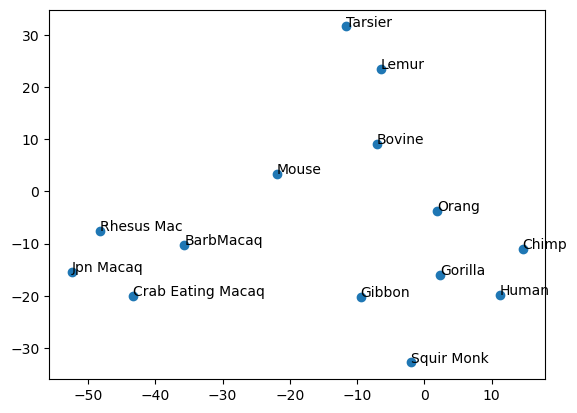

In [48]:
# Plot a scatterplot of the embedded data, labelling each point with the species.
plt.figure()
plt.scatter(embedded_data[0], embedded_data[1])
# Annotation
for i, txt in enumerate(embedded_data.index):
    plt.annotate(txt, (embedded_data[0][i], embedded_data[1][i]))
plt.show()

Question 6a [2pt].

The embedding allows us to visualize the high dimensional sequencing data while trying to preserve as much structure in the data. However, whenever we embed data from high dimension into low dimension, we run the risk of losing some information. Are there any species that appear to be clustered together in the embedding that are not closely related? Use your `get_distance()` method to compute the distance between these species and compare it the visual distance between the species in the embedding. Do you see any species that appear to be clustered together in the embedding that are not closely related? If so, which species are they?

Note that tSNE will converge to a different solution each time you run it, so the relative positions of the points may change each time you run the code. You may need to run the code a few times to find the species that appear to be clustered together in the embedding but are not closely related. Just make sure to submit the notebook with the plot that you used to answer this question.



Answer: While the graph does cluster related species together, it has obvious flaws. The mouse appears significantly closer to the bovine than it does to the lemur or tarsier, despite being similarly related.

In [63]:
# Print out the true tree distance between the species that appear to be clustered together in the embedding

print(extended_tree.get_distance("Mouse", "Bovine"))
print(extended_tree.get_distance("Mouse", "Tarsier"))

print(extended_tree.get_distance("Gorilla", "Orang"))
print(extended_tree.get_distance("Gorilla", "Gibbon"))
print(extended_tree.get_distance("Gorilla", "Chimp"))
print(extended_tree.get_distance("Gorilla", "Human"))
print(extended_tree.get_distance("Gorilla", "Squir Monk"))

print(extended_tree.get_distance("Jpn Macaq", "Crab Eating Macaq"))
print(extended_tree.get_distance("Jpn Macaq", "BarbMacaq"))
print(extended_tree.get_distance("Jpn Macaq", "Rhesus Mac"))

print(extended_tree.get_distance("Tarsier", "Lemur"))






    
#raise NotImplementedError

4
4
3
4
3
3
6
3
4
2
2
